In [1]:
import boxey as bx
import numpy as np
from boxey import Process, Input, Model
import matplotlib.pyplot as plt

In [2]:
# List the names of the compartments
mycompartments = ['A', 'B']

# List the processes to represent.
# Process needs: (name, magnitude, compartment of origin, destination compartment)
myprocesses = [ Process('process1', 10., 'A', 'B'),
            # Process('process3', 5., 'B', 'A'),
          Process('process2', 2., 'B', None) # destination None leaves the system
          ]

# List the inputs to use. 
# Input needs: (name, magnitude, time, compartment receiving input)
myinputs = [ Input('input1', 0.1, None, 'A'), # time None makes constant emissions
              Input('input2', [0.,.1], [30,60], 'A')]


In [3]:
model = bx.create_model(mycompartments, myprocesses)
model = bx.add_inputs(model, myinputs)
tstart, tend = 0, 60
solution = model.run(np.arange(tstart, tend, 1), initial_conditions=None)
solution = model.run_rk4(tstart, tend, 0.1, initial_conditions=None)
reservoirs = solution.reservoirs
times = solution.times

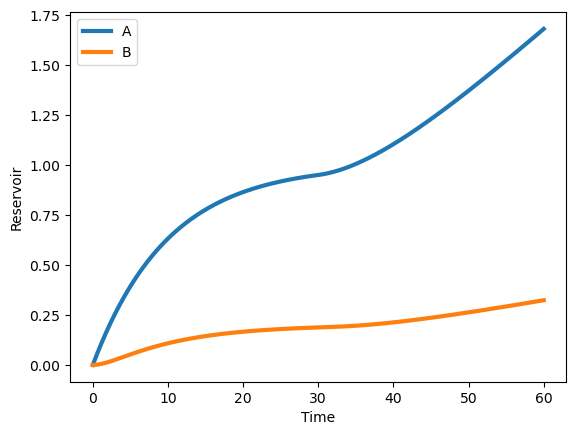

In [4]:
plt.plot(times, reservoirs, lw=3)
plt.xlabel("Time"); plt.ylabel("Reservoir");
plt.legend(labels=mycompartments);

In [5]:
model.as_json()
#model.to_json('ex.json')

'{\n    "compartments": [\n        "A",\n        "B"\n    ],\n    "piecewise_sources": [\n        {\n            "destination": "A",\n            "magnitudes": [\n                0.1,\n                0.1\n            ],\n            "name": "input1",\n            "notes": " ",\n            "time_axis": [\n                -1000000000.0,\n                1000000000.0\n            ]\n        },\n        {\n            "destination": "A",\n            "magnitudes": [\n                0.0,\n                0.1\n            ],\n            "name": "input2",\n            "notes": " ",\n            "time_axis": [\n                30,\n                60\n            ]\n        }\n    ],\n    "static_processes": [\n        {\n            "destination": "B",\n            "name": "process1",\n            "notes": " ",\n            "origin": "A",\n            "timescale": 10.0\n        },\n        {\n            "destination": "out",\n            "name": "process2",\n            "notes": " ",\n  

In [6]:
solution.display_processes()

process1:
  10.0 time units A -> B
 reference:  
process2:
  2.0 time units B -> None
 reference:  


In [7]:
solution.get_fluxes(1), solution.get_fluxes( 29),

({'process1': 0.009516258195643702, 'process2': 0.002058589649058164},
 {'process1': 0.09449767799301848, 'process2': 0.09312211009997456})

In [8]:
solution.to_dataframe()

,Year,A,B
0,0.0,0.000000,0.000000
1,0.1,0.009950,0.000049
2,0.2,0.019801,0.000192
3,0.3,0.029554,0.000424
4,0.4,0.039211,0.000739
...,...,...,...
596,59.6,1.668026,0.321007
597,59.7,1.671214,0.321637
598,59.8,1.674402,0.322267
599,59.9,1.677592,0.322898


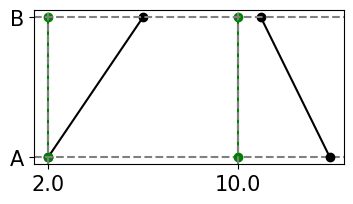

In [9]:
bx.eigen_analysis_plot(model)

In [10]:
E = model.eigenvectors
v1, v2 = E[:,0], E[:,1]

In [11]:
v1, v2

(array([0., 1.]), array([0.9701425 , 0.24253563]))

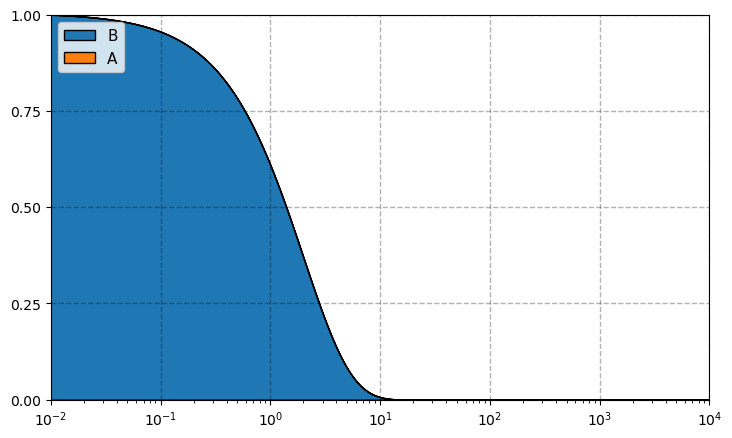

In [12]:
from boxey import plot_perturbation
plot_perturbation(model, perturbation_vector=v1/v1.sum());

In [13]:
model.set_inputs_to_use([])
solution = model.run(np.arange(tstart, tend, 1), initial_conditions=v2)
reservoirs = solution.reservoirs
times = solution.times

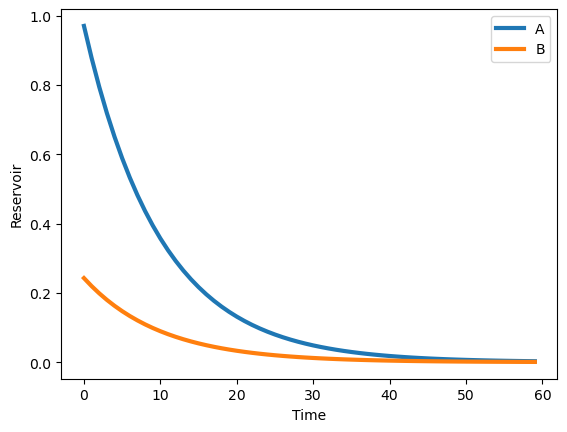

In [14]:
plt.plot(times, reservoirs, lw=3)
plt.xlabel("Time"); plt.ylabel("Reservoir");
plt.legend(labels=mycompartments);

4.0

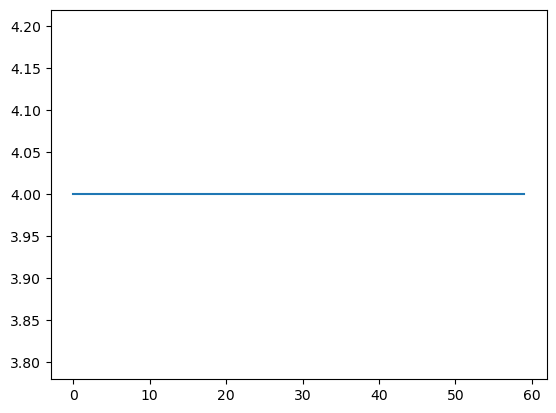

In [15]:
plt.plot(reservoirs[:,0]/reservoirs[:,1])
v2[0]/v2[1]